In [14]:
import import_ipynb
from YFLD import *
import pandas as pd

In [15]:
aapl=(raw
     .iloc[:,::2]
     .pipe(fix_cols))
aapl

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,6.487535,7.643214,7.660714,7.585000,7.622500,493729600
2010-01-05,6.498752,7.656429,7.699643,7.616071,7.664286,601904800
2010-01-06,6.395380,7.534643,7.686786,7.526786,7.656429,552160000
2010-01-07,6.383555,7.520714,7.571429,7.466071,7.562500,477131200
2010-01-08,6.425995,7.570714,7.571429,7.466429,7.510714,447610800
...,...,...,...,...,...,...
2019-12-23,69.261612,71.000000,71.062500,70.092499,70.132500,98572000
2019-12-24,69.327454,71.067497,71.222504,70.730003,71.172501,48478800
2019-12-26,70.702934,72.477501,72.495003,71.175003,71.205002,93121200


<AxesSubplot:xlabel='Date'>

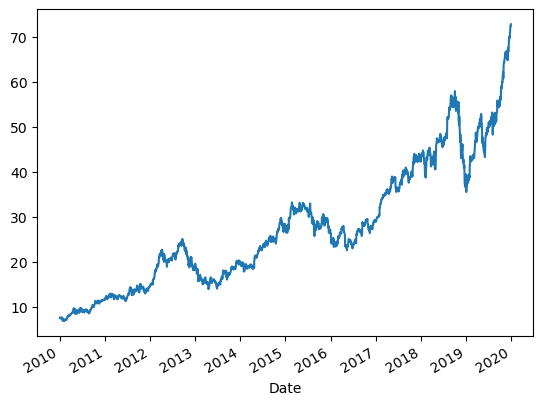

In [16]:
(aapl.Close.plot())

<AxesSubplot:xlabel='Date'>

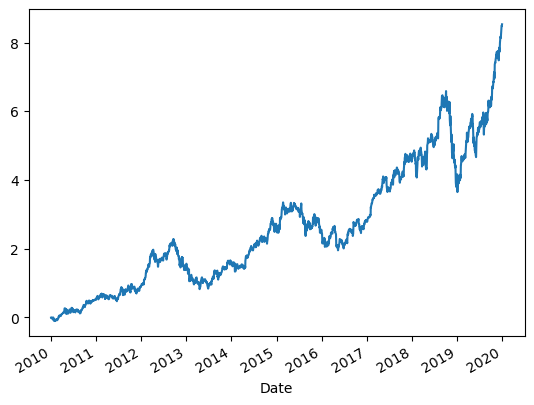

In [17]:
(aapl.Close.sub(aapl.Close[0]).div(aapl.Close[0]).plot())

<AxesSubplot:xlabel='Date'>

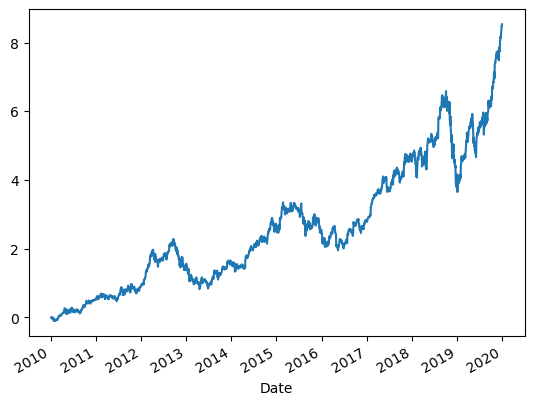

In [19]:
(aapl.Close.pct_change().add(1).cumprod().sub(1).plot())

In [20]:
np.cumprod?


<AxesSubplot:xlabel='Date'>

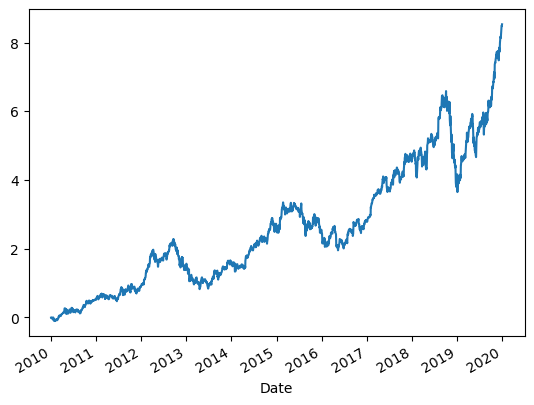

In [25]:
def calc_cum_returns(df, col):
    ser = df[col]
    return( ser
          .sub(ser[0])
          .div(ser[0])
          )
(aapl.pipe(calc_cum_returns, 'Close').plot())

In [26]:
def get_returns(df):
    return calc_cum_returns(df, 'Close')

get_returns(aapl)

Date
2010-01-04    0.000000
2010-01-05    0.001729
2010-01-06   -0.014205
2010-01-07   -0.016027
2010-01-08   -0.009486
                ...   
2019-12-23    8.289286
2019-12-24    8.298117
2019-12-26    8.482594
2019-12-27    8.478996
2019-12-30    8.535255
Name: Close, Length: 2515, dtype: float64

In [27]:
(lambda df: get_returns(df))(aapl)

Date
2010-01-04    0.000000
2010-01-05    0.001729
2010-01-06   -0.014205
2010-01-07   -0.016027
2010-01-08   -0.009486
                ...   
2019-12-23    8.289286
2019-12-24    8.298117
2019-12-26    8.482594
2019-12-27    8.478996
2019-12-30    8.535255
Name: Close, Length: 2515, dtype: float64

In [30]:
(aapl.assign(cum_returns=(lambda df: calc_cum_returns(df, 'Close'))))

,Adj Close,Close,High,Low,Open,Volume,cum_returns
Date,,,,,,,
2010-01-04,6.487535,7.643214,7.660714,7.585000,7.622500,493729600,0.000000
2010-01-05,6.498752,7.656429,7.699643,7.616071,7.664286,601904800,0.001729
2010-01-06,6.395380,7.534643,7.686786,7.526786,7.656429,552160000,-0.014205
2010-01-07,6.383555,7.520714,7.571429,7.466071,7.562500,477131200,-0.016027
2010-01-08,6.425995,7.570714,7.571429,7.466429,7.510714,447610800,-0.009486
...,...,...,...,...,...,...,...
2019-12-23,69.261612,71.000000,71.062500,70.092499,70.132500,98572000,8.289286
2019-12-24,69.327454,71.067497,71.222504,70.730003,71.172501,48478800,8.298117
2019-12-26,70.702934,72.477501,72.495003,71.175003,71.205002,93121200,8.482594


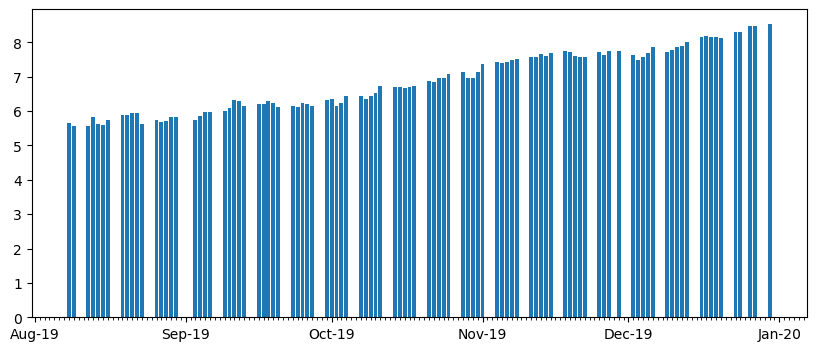

In [34]:
def my_bar(ser, ax):
    ax.bar(ser.index, ser)
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%y'))
    ax.xaxis.set_minor_locator(dates.DayLocator())
    return ser
    
fig, ax = plt.subplots(figsize = (10,4))
_ = (aapl.pipe(calc_cum_returns, 'Close').iloc[-100:].pipe(my_bar, ax))

# Volatility

## goals
* more complicated pandas
* learn about rolling operations

In [36]:
(aapl.Close.mean())

27.568102107796943

In [37]:
(aapl.Close.std())

14.016253049378737

In [40]:
(aapl.assign(pct_change_close=aapl.Close.pct_change()).pct_change_close.std())

0.01623613318144792

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

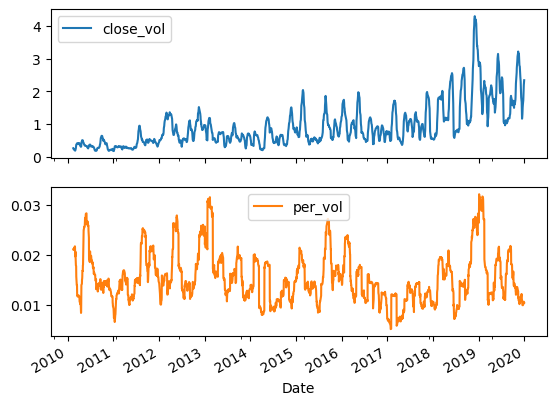

In [41]:
(aapl.assign(close_vol=aapl.rolling(30).Close.std(),per_vol=aapl.Close.pct_change().rolling(30).std()).iloc[:,-2:].plot(subplots=True))

In [45]:
(aapl.assign(pct_change_close=aapl.Close.pct_change()).resample('15D').std())

,Adj Close,Close,High,Low,Open,Volume,pct_change_close
Date,,,,,,,
2010-01-04,0.078054,0.091958,0.072060,0.101749,0.080372,7.028347e+07,0.010383
2010-01-19,0.226749,0.267141,0.253188,0.232856,0.234097,4.361002e+08,0.030046
2010-02-03,0.113049,0.133188,0.102614,0.124059,0.123349,1.455474e+08,0.017088
2010-02-18,0.136917,0.161306,0.138608,0.166270,0.157960,9.844200e+07,0.011254
2010-03-05,0.074274,0.087505,0.088090,0.113449,0.129484,1.951401e+08,0.014002
...,...,...,...,...,...,...,...
2019-10-29,1.743583,1.725581,1.449098,2.018594,1.418779,2.960150e+07,0.013412
2019-11-13,0.514850,0.527773,0.404718,0.436709,0.509585,1.787058e+07,0.009868
2019-11-28,0.974394,0.998849,1.019784,0.918851,0.936544,2.826525e+07,0.012526


In [46]:
(aapl.assign(pct_change_close=aapl.Close.pct_change()).rolling(window=15, min_periods=15).std())

,Adj Close,Close,High,Low,Open,Volume,pct_change_close
Date,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-12-23,1.842514,1.888754,1.932242,1.953716,1.906586,4.891036e+07,0.010997
2019-12-24,1.731423,1.774875,1.762143,1.842910,1.836871,5.206250e+07,0.009136
2019-12-26,1.753129,1.797126,1.757091,1.821097,1.758186,5.084715e+07,0.009786


<AxesSubplot:xlabel='Date'>

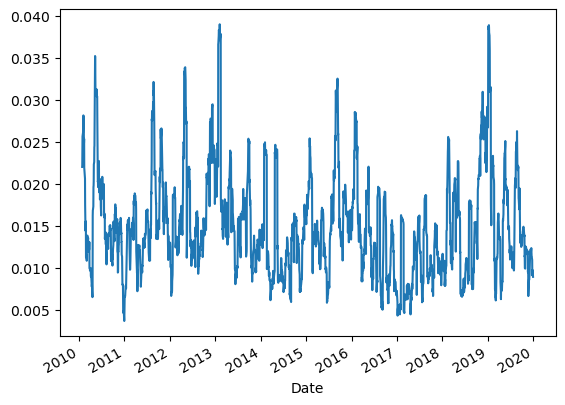

In [52]:
(aapl.assign(pct_change=aapl.Close.pct_change()).rolling(window=15, min_periods=15).std()['pct_change'].plot())

### calculations by rolling and grouping


# Challenge
## Plot the rolling volatitlity over 30-day sliding windows for 2015-2019

<AxesSubplot:xlabel='Date'>

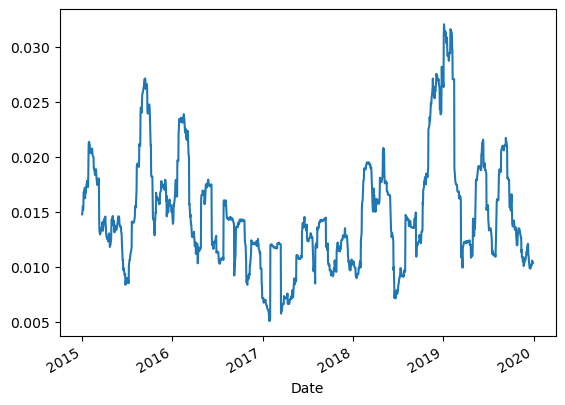

In [62]:
(aapl.assign(pct_change=aapl.Close.pct_change()).rolling(window=30, min_periods=30).pct_change.std().loc["2015":"2019"]
 .plot()

)